In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ase.io as io

plt.rcParams.update({
    "font.family": "serif",       
    "font.size": 12,              
    "axes.labelsize": 14,         
    "axes.titlesize": 16,         
    "xtick.labelsize": 12,        
    "ytick.labelsize": 12,       
    "legend.fontsize": 12,      
    "text.usetex": True       
})

In [3]:
import pandas as pd
import json

# Load the file
file_path = "training_results_small/MACE_revPBE_D3_50_run-3_train.txt"  # Replace with actual file path
data = []

# Read line by line (JSONL format)
with open(file_path, "r") as f:
    for line in f:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError:
            print(f"Skipping invalid line: {line}")

# Convert to DataFrame
df = pd.DataFrame(data)

# # Display data
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Parsed Data", dataframe=df)


In [4]:
eval_df = df[df["mode"] == "eval"].dropna(subset=["epoch"]) # first two epoch values are NaN (initial values )
eval_df.head()

,loss,mae_e,mae_e_per_atom,rmse_e,rmse_e_per_atom,q95_e,mae_f,rel_mae_f,rmse_f,rel_rmse_f,...,mae_stress,rmse_stress,q95_stress,mae_virials,rmse_virials,rmse_virials_per_atom,q95_virials,time,mode,epoch
4974,0.000143,3.862861,0.069275,19.012261,0.227180,18.683219,0.086108,72.257511,0.330167,18.386127,...,0.002122,0.008283,0.008642,1.535178,12.423289,0.278499,3.803079,3.523449,eval,0.0
4975,0.000190,2.601914,0.008702,3.467192,0.011596,5.371271,0.094331,13.373476,0.137786,14.841953,...,0.017193,0.028081,0.061748,49.144550,80.838254,0.270362,180.565038,0.121214,eval,0.0
9948,0.000119,2.476891,0.049139,12.123180,0.148069,10.328448,0.082815,69.494830,0.391565,21.805190,...,0.002230,0.008132,0.009118,1.557667,12.317545,0.277109,3.922468,3.525423,eval,1.0
9949,0.000129,1.680313,0.005620,1.784443,0.005968,2.203699,0.067619,9.586435,0.101745,10.959723,...,0.013014,0.021748,0.051265,37.339527,62.988779,0.210665,149.908814,0.120381,eval,1.0
14922,0.000105,1.390358,0.032492,5.768911,0.077958,4.286381,0.084967,71.300287,0.458328,25.523051,...,0.002645,0.009423,0.010868,1.833691,13.363048,0.292660,4.720895,3.539335,eval,2.0


In [5]:
eval_pt_df = eval_df.iloc[::2]
eval_default_df = eval_df.iloc[1::2]

eval_default_df.head()

,loss,mae_e,mae_e_per_atom,rmse_e,rmse_e_per_atom,q95_e,mae_f,rel_mae_f,rmse_f,rel_rmse_f,...,mae_stress,rmse_stress,q95_stress,mae_virials,rmse_virials,rmse_virials_per_atom,q95_virials,time,mode,epoch
4975,0.000190,2.601914,0.008702,3.467192,0.011596,5.371271,0.094331,13.373476,0.137786,14.841953,...,0.017193,0.028081,0.061748,49.144550,80.838254,0.270362,180.565038,0.121214,eval,0.0
9949,0.000129,1.680313,0.005620,1.784443,0.005968,2.203699,0.067619,9.586435,0.101745,10.959723,...,0.013014,0.021748,0.051265,37.339527,62.988779,0.210665,149.908814,0.120381,eval,1.0
14923,0.000110,1.096878,0.003668,1.212802,0.004056,1.632070,0.059170,8.388661,0.088551,9.538506,...,0.009988,0.017511,0.043515,28.783827,50.980158,0.170502,127.248008,0.120308,eval,2.0
19897,0.000098,1.079114,0.003609,1.119737,0.003745,1.516732,0.053127,7.531992,0.079015,8.511343,...,0.010399,0.018126,0.044895,29.948838,52.742326,0.176396,131.282831,0.120130,eval,3.0
24871,0.000091,1.210504,0.004049,1.270123,0.004248,1.789221,0.049159,6.969410,0.073639,7.932244,...,0.011200,0.019250,0.047122,32.215099,55.940046,0.187090,137.794041,0.120236,eval,4.0


In [8]:
opt_df = df[df["mode"] == "opt"]
opt_df_avg = opt_df.groupby("epoch")["loss"].mean() # avg over all batches for each epoch
opt_df_sd = opt_df.groupby("epoch")["loss"].std()
opt_df_avg

epoch
0.0     0.002353
1.0     0.001105
2.0     0.000904
3.0     0.000782
4.0     0.000746
5.0     0.000715
6.0     0.000690
7.0     0.000689
8.0     0.000684
9.0     0.000680
10.0    0.000667
11.0    0.000664
12.0    0.000662
13.0    0.000656
14.0    0.000657
15.0    0.000653
16.0    0.000652
17.0    0.000653
18.0    0.000648
19.0    0.000648
Name: loss, dtype: float64

- "opt": optimsation loss, training set loss
    - computed for every batch, including pretraining data
    - the average is technically at half an epoch
- "eval": evaluation loss, validation set loss
    - data for every epoch
    - first value is pt_head and 2nd is default

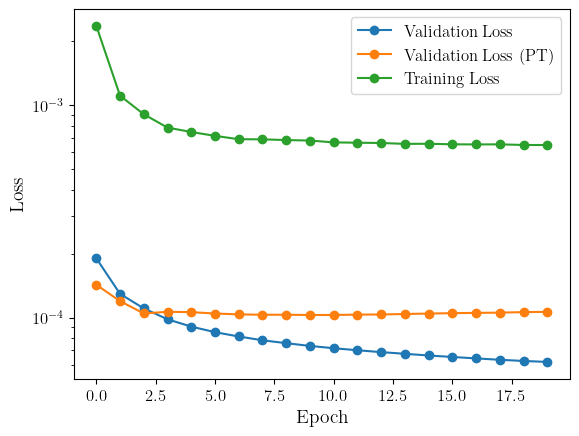

In [9]:
plt.plot(eval_default_df["epoch"], eval_default_df["loss"], marker="o", label="Validation Loss")
plt.plot(eval_pt_df["epoch"], eval_pt_df["loss"], marker="o", label="Validation Loss (PT)")
plt.plot(opt_df_avg.index, opt_df_avg, marker="o", label="Training Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.yscale("log")
plt.show()

- Validation loss for the pt head increases as the model is finetuned away from the pretraining dataset with the default head

- training loss on materials project dataset, avg ~5000 samples
- small model may struggle with mptraj dataset

In [6]:
def plot_loss_single(results_path):

    data = []

    with open(results_path, "r") as f:
        for line in f:
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError:
                print(f"Skipping invalid line: {line}")

    df = pd.DataFrame(data)

    # epoch (for validation)
    eval_df = df[df["mode"] == "eval"].dropna(subset=["epoch"]) # first two epoch values are NaN (initial values )
    eval_pt_df = eval_df.iloc[::2]
    eval_default_df = eval_df.iloc[1::2]

    # batch (for training)
    opt_df = df[df["mode"] == "opt"]
    opt_df_avg = opt_df.groupby("epoch")["loss"].mean() # avg over all batches for each epoch
    opt_df_sd = opt_df.groupby("epoch")["loss"].std()

    plt.plot(eval_default_df["epoch"], eval_default_df["loss"], marker="o", label="Validation Loss")
    plt.plot(eval_pt_df["epoch"], eval_pt_df["loss"], marker="o", label="Validation Loss (PT)")
    plt.plot(opt_df_avg.index, opt_df_avg, marker="o", label="Training Loss")

    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.legend()
    plt.yscale("log")
    plt.show()

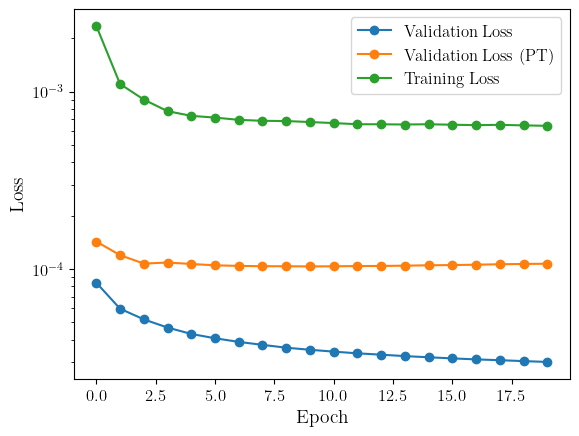

In [7]:
plot_loss_single("training_results_small/MACE_revPBE_D3_200_run-3_train.txt")

In [23]:
import re

def plot_loss_many(results_paths, FT, ylims=(0.00002, 0.005)):

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns layout
    axes = axes.flatten()  # Flatten for easy iteration
    
    for i, results_path in enumerate(results_paths):
        data = []
        with open(results_path, "r") as f:
            for line in f:
                try:
                    data.append(json.loads(line))
                except json.JSONDecodeError:
                    print(f"Skipping invalid line in {results_path}: {line}")

        df = pd.DataFrame(data)

        # Extract validation (eval) and training (opt) loss
        eval_df = df[df["mode"] == "eval"].dropna(subset=["epoch"])
        opt_df = df[df["mode"] == "opt"]
        opt_df_avg = opt_df.groupby("epoch")["loss"].mean()
        
        if FT == True:
            eval_pt_df = eval_df.iloc[::2]
            eval_default_df = eval_df.iloc[1::2]

            # Plot in the corresponding subplot
            ax = axes[i]
            ax.plot(eval_default_df["epoch"], eval_default_df["loss"], marker="o", label="Validation Loss")
            ax.plot(eval_pt_df["epoch"], eval_pt_df["loss"], marker="o", label="Validation Loss (PT)")
            ax.plot(opt_df_avg.index, opt_df_avg, marker="o", label="Training Loss")
        else:
            ax = axes[i]
            ax.plot(eval_df["epoch"], eval_df["loss"], marker="o", label="Validation Loss")
            ax.plot(opt_df_avg.index, opt_df_avg, marker="o", label="Training Loss")

        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.set_yscale("log") 
        ax.set_ylim(ylims)
        ax.grid(True)
        ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        if i == 0: 
            ax.legend()
        
        number_match = re.search(r"D3_(\d+)_run", results_path)
        number = number_match.group(1) if number_match else "Unknown"
        ax.set_title(f"Training set size = {number}")

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [9]:
results_paths_small = [
    "training_results_small/MACE_revPBE_D3_10_run-3_train.txt",
    "training_results_small/MACE_revPBE_D3_20_run-3_train.txt",
    "training_results_small/MACE_revPBE_D3_30_run-3_train.txt",
    "training_results_small/MACE_revPBE_D3_50_run-3_train.txt",
    "training_results_small/MACE_revPBE_D3_100_run-3_train.txt",
    "training_results_small/MACE_revPBE_D3_200_run-3_train.txt",
]

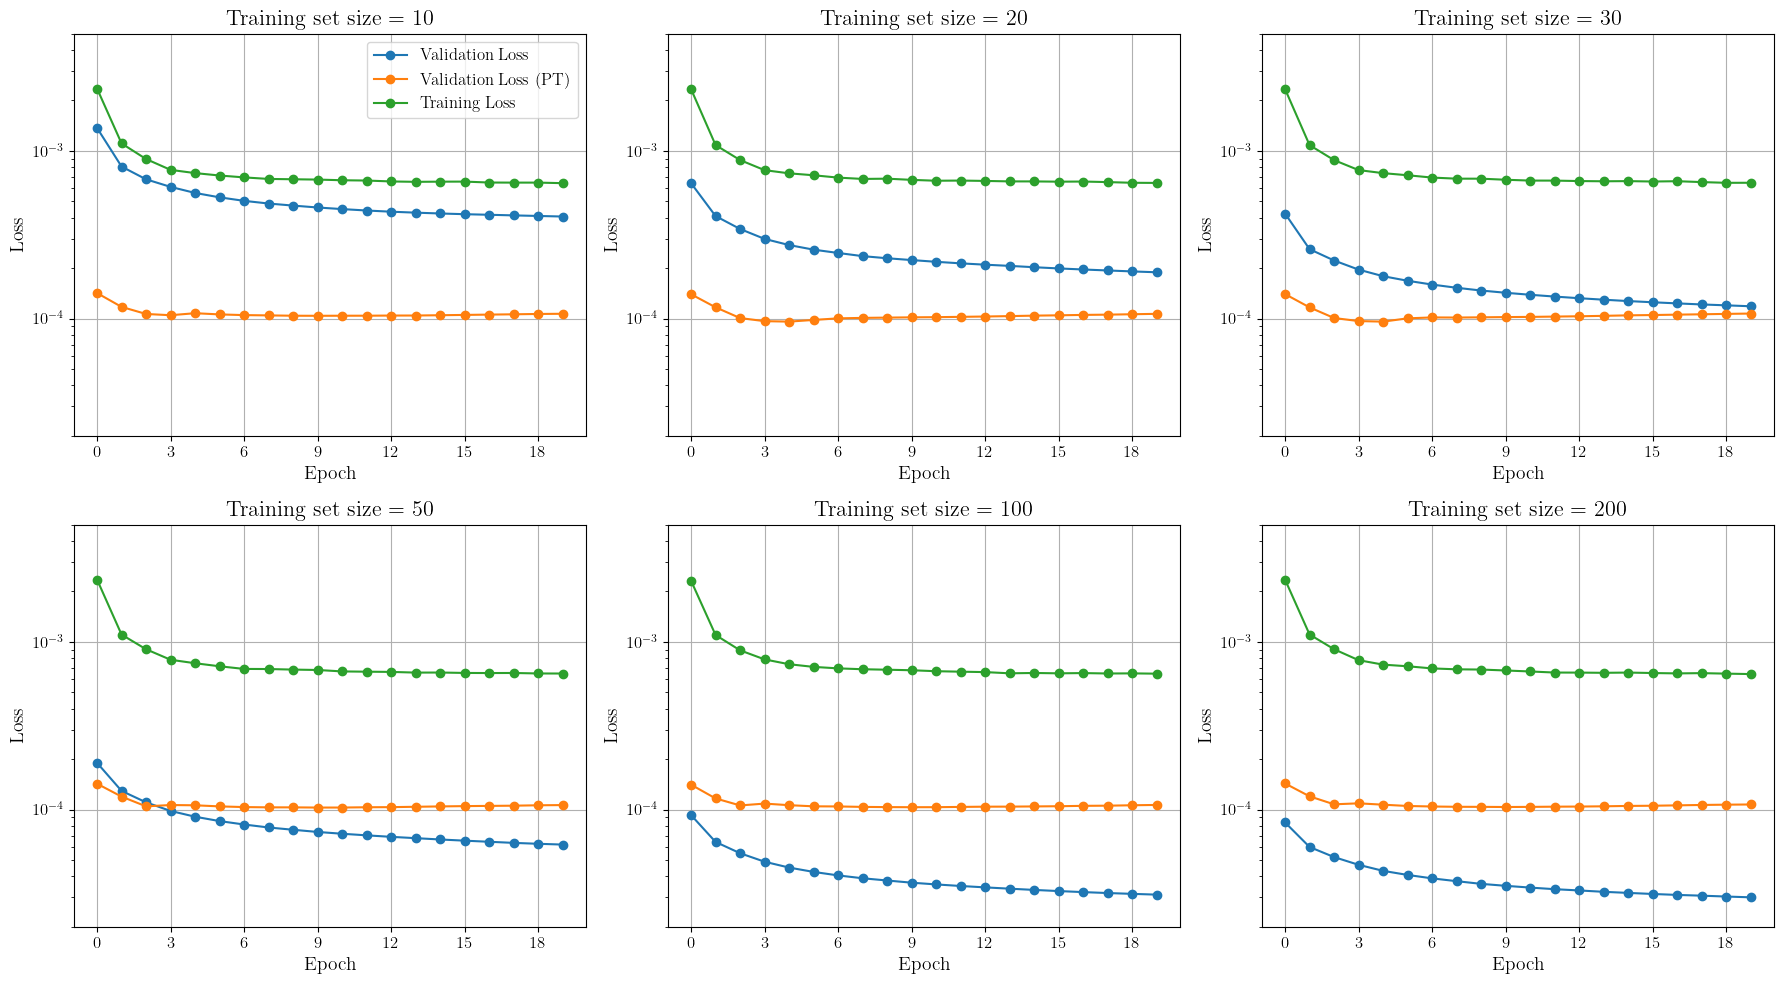

In [24]:
plot_loss_many(results_paths_small, FT=True)

- do separate training losses
- PT val curve stays reasonbly flat, model not forgetting, performing well on pretraining data validation set
- should curves sum?
- figure out how exactly training loss is calculated

In [134]:
results_paths_medium = [
    "training_results_medium/MACE_medium_revPBE_D3_10_run-3_train.txt",
    "training_results_medium/MACE_medium_revPBE_D3_50_run-3_train.txt",
    "training_results_medium/MACE_medium_revPBE_D3_100_run-3_train.txt",
    "training_results_medium/MACE_medium_revPBE_D3_150_run-3_train.txt",
    "training_results_medium/MACE_medium_revPBE_D3_300_run-3_train.txt",
]

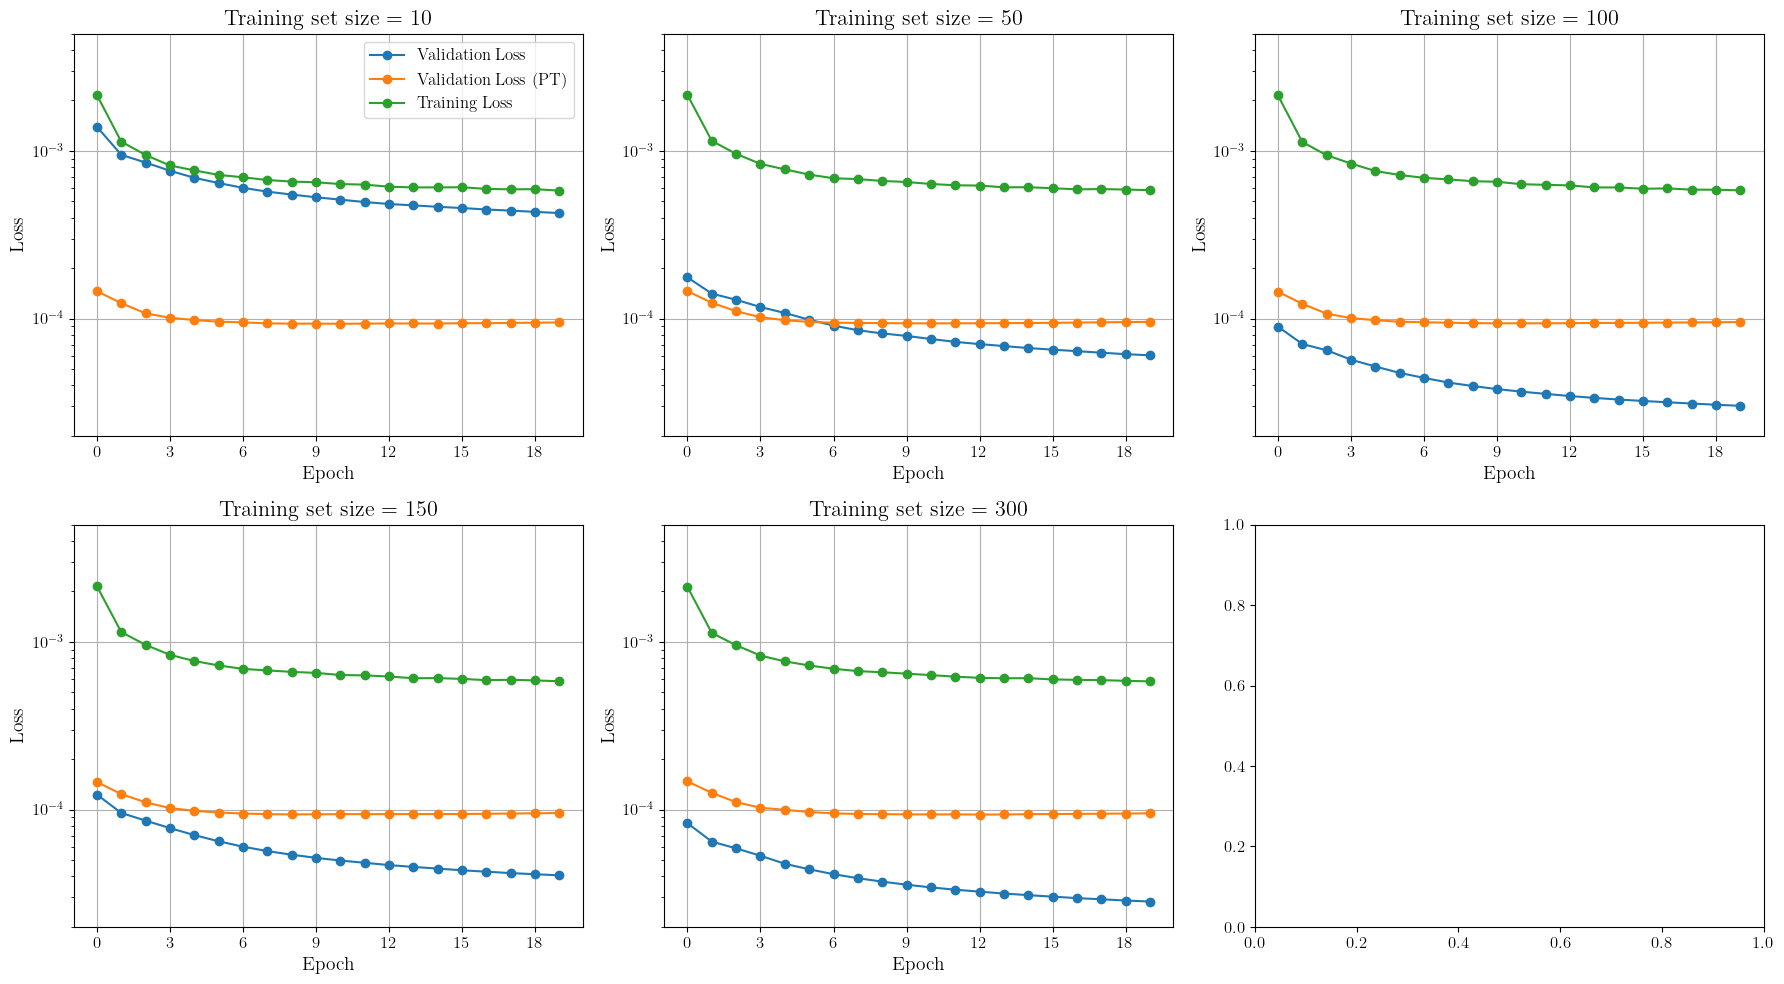

In [135]:
plot_loss_many(results_paths_medium)

In [19]:
results_paths_scratch_newE0 = [
    "training_results_scratch/MACE_model_scratch_newE0s_revPBE_D3_10_run-123_train.txt",
    "training_results_scratch/MACE_model_scratch_newE0s_revPBE_D3_30_run-123_train.txt",
    "training_results_scratch/MACE_model_scratch_newE0s_revPBE_D3_50_run-123_train.txt",
    "training_results_scratch/MACE_model_scratch_newE0s_revPBE_D3_100_run-123_train.txt",
    "training_results_scratch/MACE_model_scratch_newE0s_revPBE_D3_200_run-123_train.txt",
    "training_results_scratch/MACE_model_scratch_newE0s_revPBE_D3_300_run-123_train.txt"
]

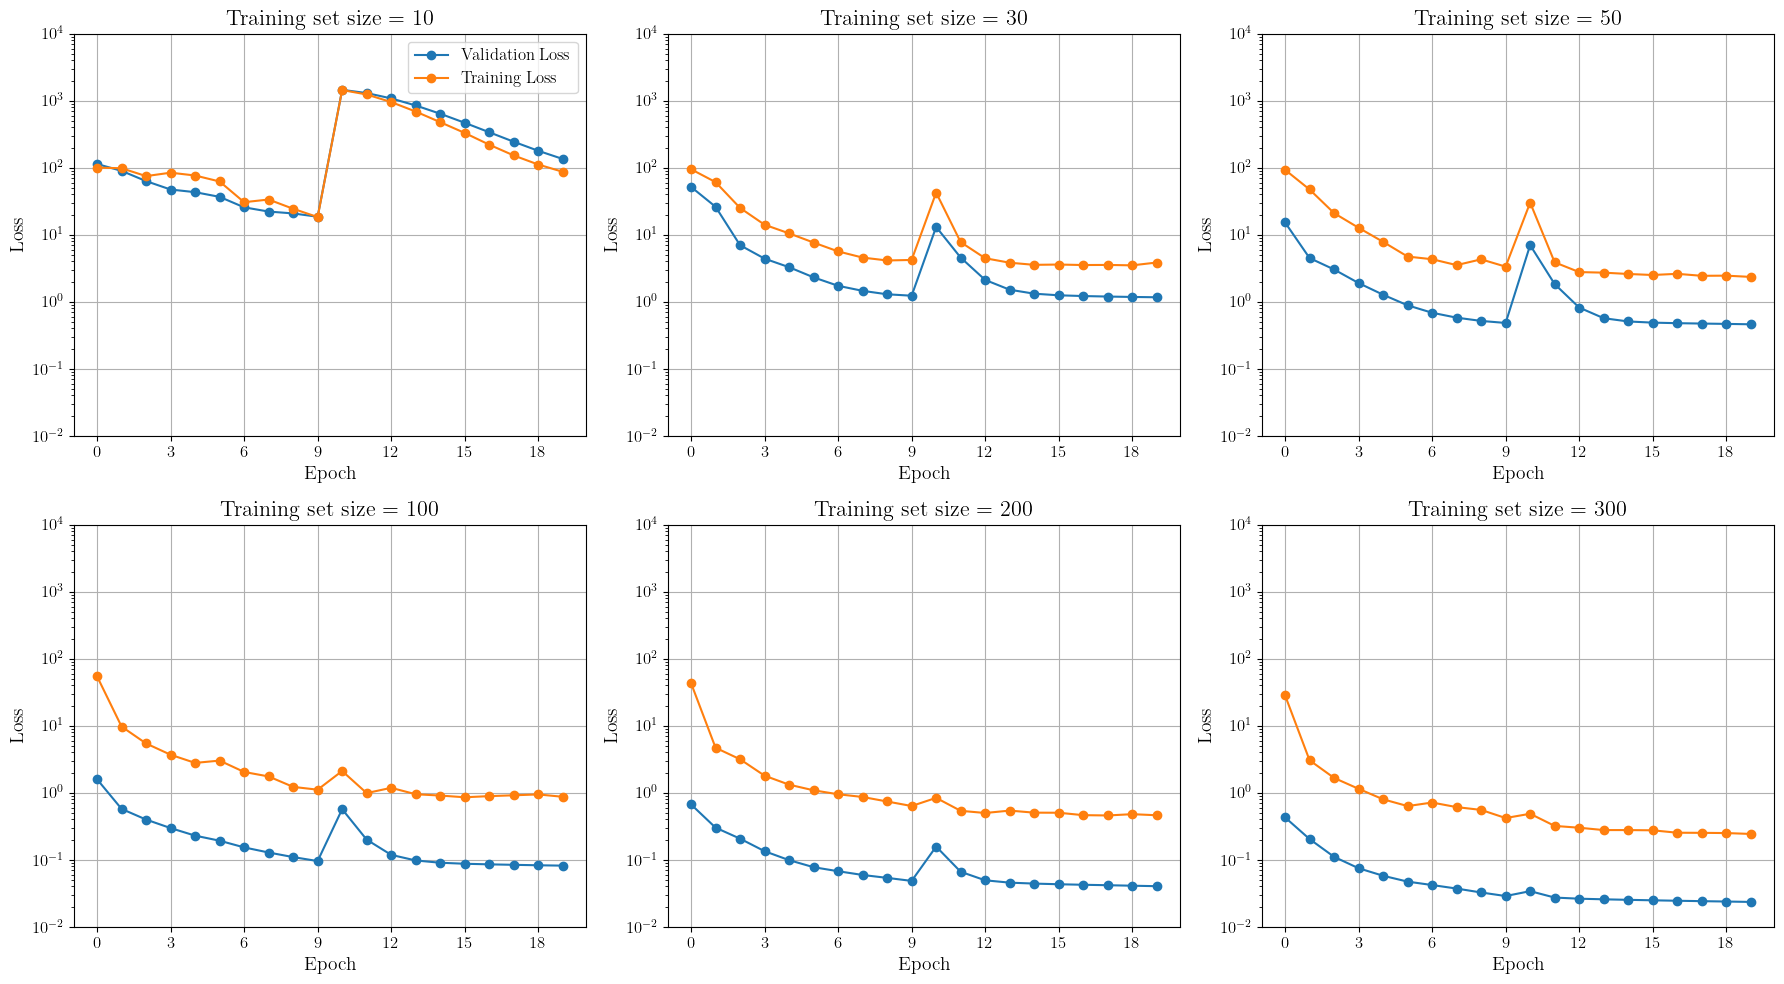

In [29]:
plot_loss_many(results_paths_scratch_newE0, FT=False, ylims=(0.01, 10000))

In [27]:
results_paths_medium_newE0_revPBE = [
    "training_results_medium/MACE_medium_newE0s_revPBE_D3_10_run-3_train.txt",
    "training_results_medium/MACE_medium_newE0s_revPBE_D3_30_run-3_train.txt",
    "training_results_medium/MACE_medium_newE0s_revPBE_D3_50_run-3_train.txt",
    "training_results_medium/MACE_medium_newE0s_revPBE_D3_100_run-3_train.txt",
    "training_results_medium/MACE_medium_newE0s_revPBE_D3_200_run-3_train.txt",
    "training_results_medium/MACE_medium_newE0s_revPBE_D3_300_run-3_train.txt"

]

- PT head loss flat --> model not forgetting
- why does loss not decrease too much for default head training

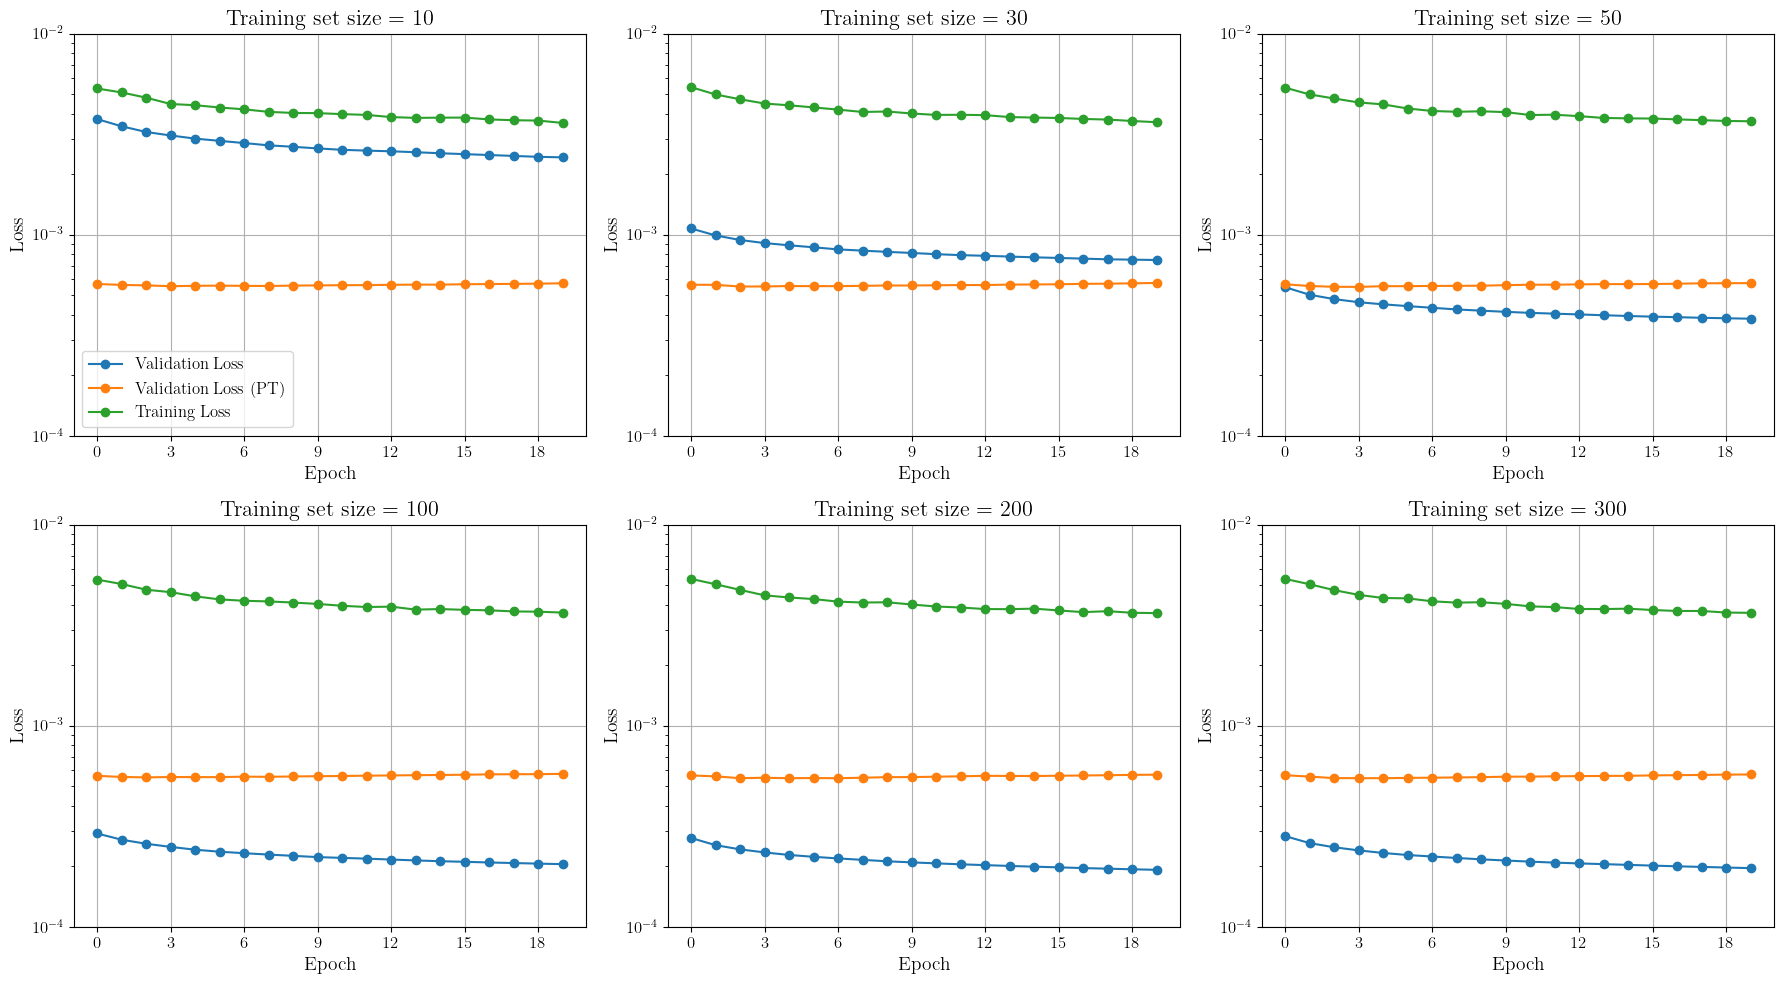

In [28]:
plot_loss_many(results_paths_medium_newE0_revPBE, FT=True, ylims=(0.0001, 0.01))

### Evaluation of model on training and test data

In [2]:
from mace.cli.eval_configs import main as mace_eval_configs_main
import sys

def eval_mace(configs, model, output):
    sys.argv = ["program", "--configs", configs, "--model", model, "--output", output]
    mace_eval_configs_main()

/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/venv_mace/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.dirname(__file__), 'constants.pt'))


In [ ]:
eval_mace(configs="/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/training_val_sets/training_set_20_revPBE_D3.xyz",
          model="/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/FT_models/MACE_revPBE_D3_20.model",
          output="/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/tests/revPBE_D3/train_20.xyz")

print("evaluating test set....")
eval_mace(configs="/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/training_val_sets/validation_set_100_revPBE_D3.xyz",
          model="/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/FT_models/MACE_revPBE_D3_20.model",
          output="/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/tests/revPBE_D3/test_20.xyz")

/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/venv_mace/lib/python3.12/site-packages/mace/cli/eval_configs.py:78: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  model = torch.load(f=args.model, map_location=args.device)


evaluating test set....


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/venv_mace/lib/python3.12/site-packages/mace/cli/eval_configs.py:78: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  model = torch.load(f=args.model, map_location=args.device)


In [11]:
from aseMolec import pltProps as pp
from ase.io import read
import matplotlib.pyplot as plt
from aseMolec import extAtoms as ea
import numpy as np

def plot_RMSEs(db, labs, theory):
    # theory = "rPBED3", "rPBE0D3", "MP2"
    
    #ea.rename_prop_tag(db, 'MACE_energy', 'energy_mace') #Backward compatibility
    #ea.rename_prop_tag(db, 'MACE_forces', 'forces_mace') #Backward compatibility
    ea.rename_prop_tag(db, f'{theory}_energy', 'energy_ref') 
    ea.rename_prop_tag(db, 'MACE_energy', 'energy_mace') 
    ea.rename_prop_tag(db, f'{theory}_forces', 'forces_ref') 
    ea.rename_prop_tag(db, 'MACE_forces', 'forces_mace')


    plt.figure(figsize=(7,5), dpi=100)
    #plt.subplot(1,3,1)
    # pp.plot_prop(ea.get_prop(db, 'bind', '', True).flatten(), \
    #              ea.get_prop(db, 'bind', '_mace', True).flatten(), \
    #              title=r'Energy $(\rm eV/atom)$ ', labs=labs, rel=False)
    plt.subplot(1,2,1)
    pp.plot_prop(ea.get_prop(db, 'info', 'energy_ref', True).flatten(), \
                 ea.get_prop(db, 'info', 'energy_mace', True).flatten(), \
                 title=r'Energy $(\rm eV/atom)$ ', labs=labs, rel=False)
    plt.subplot(1,2,2)
    pp.plot_prop(np.concatenate(ea.get_prop(db, 'arrays', 'forces_ref')).flatten(), \
                 np.concatenate(ea.get_prop(db, 'arrays', 'forces_mace')).flatten(), \
                 title=r'Forces $\rm (eV/\AA)$ ', labs=labs, rel=False)
    plt.tight_layout()

    return


def calc_RMSE(db, theory):
    ea.rename_prop_tag(db, f'{theory}_energy', 'energy_ref') 
    ea.rename_prop_tag(db, 'MACE_energy', 'energy_mace') 
    ea.rename_prop_tag(db, f'{theory}_forces', 'forces_ref') 
    ea.rename_prop_tag(db, 'MACE_forces', 'forces_mace')
    
    
    # rmse = np.sqrt(np.mean((prop1-prop2)**2))
    rmse_energy = np.sqrt(np.mean((ea.get_prop(db, 'info', 'energy_ref', True).flatten() - ea.get_prop(db, 'info', 'energy_mace', True).flatten())**2))
    rmse_forces = np.sqrt(np.mean((np.concatenate(ea.get_prop(db, 'arrays', 'forces_ref')).flatten() - np.concatenate(ea.get_prop(db, 'arrays', 'forces_mace')).flatten())**2))

    return rmse_energy, rmse_forces

0.0017 eV / atom -> 0.0017 * e * Na / 1000 = 0.16 KJ/mol

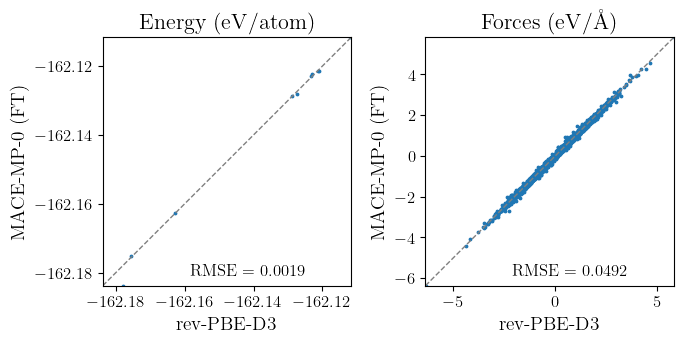

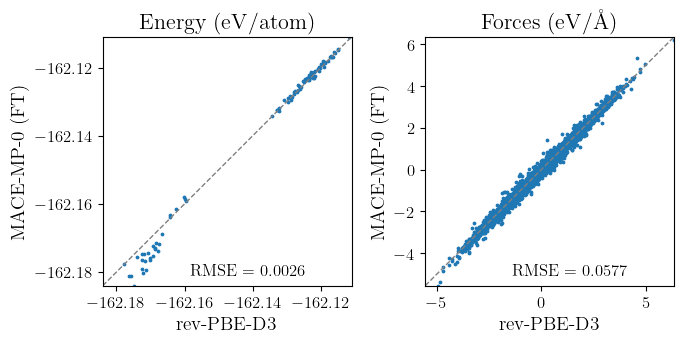

In [53]:
train_data_10 = read("/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/results/evaluation_data/FT_rev_PBE_D3_10_eval_train.xyz", ':')
#test_data = train_data[:3]+read("/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/tests/revPBE_D3/FT_rev_PBE_D3_eval_test.xyz", ':') #append the E0s for computing atomization energy errors

test_data_10 = read("/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/results/evaluation_data/FT_rev_PBE_D3_10_eval_test.xyz", ':')

plot_RMSEs(train_data_10, labs=['rev-PBE-D3', 'MACE-MP-0 (FT)'], theory="rPBED3")
plot_RMSEs(test_data_10, labs=['rev-PBE-D3', 'MACE-MP-0 (FT)'], theory="rPBED3")

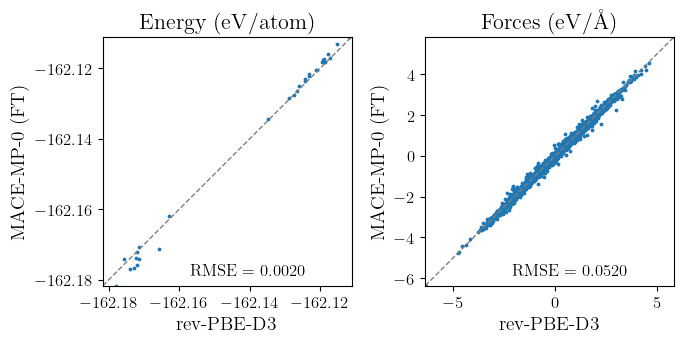

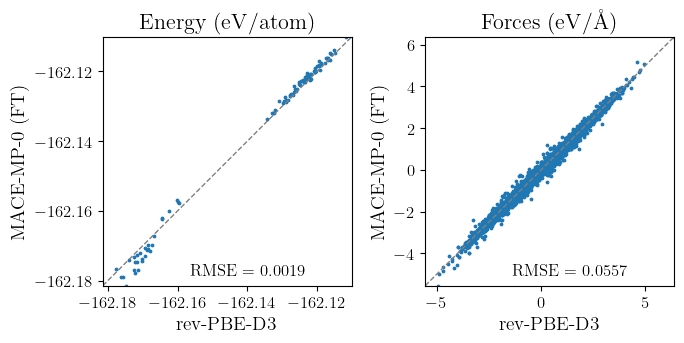

In [54]:
train_data_30 = read("/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/results/evaluation_data/FT_rev_PBE_D3_30_eval_train.xyz", ':')
#test_data = train_data[:3]+read("/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/tests/revPBE_D3/FT_rev_PBE_D3_eval_test.xyz", ':') #append the E0s for computing atomization energy errors

test_data_30 = read("/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/results/evaluation_data/FT_rev_PBE_D3_30_eval_test.xyz", ':')

plot_RMSEs(train_data_30, labs=['rev-PBE-D3', 'MACE-MP-0 (FT)'], theory="rPBED3")
plot_RMSEs(test_data_30, labs=['rev-PBE-D3', 'MACE-MP-0 (FT)'], theory="rPBED3")

In [184]:
training_set_sizes_small = [10, 30, 50, 100, 200, 300]
RMSE_energies_small = []
RMSE_forces_small = []

for size in training_set_sizes_small:
    test_data = read(f"evaluation_data_small/FT_rev_PBE_D3_{size}_eval_test.xyz", ':')
    calc = calc_RMSE(test_data, theory="rPBED3")
    RMSE_energies_small.append(calc[0])
    RMSE_forces_small.append(calc[1])
    
training_set_sizes_medium = [10, 50, 100]
RMSE_energies_medium = []
RMSE_forces_medium = []

for size in training_set_sizes_medium:
    test_data = read(f"evaluation_data_medium/FT_rev_PBE_D3_{size}_eval_test_medium.xyz", ':')
    calc = calc_RMSE(test_data, theory="rPBED3")
    RMSE_energies_medium.append(calc[0])
    RMSE_forces_medium.append(calc[1])
    
training_set_sizes_medium_pt1000 = [10, 30, 50, 100, 200, 300]
RMSE_energies_medium_pt1000 = []
RMSE_forces_medium_pt1000 = []

for size in training_set_sizes_medium_pt1000:
    test_data = read(f"evaluation_data_medium/FT_pt1000_medium_rev_PBE_D3_{size}_eval_test_medium.xyz", ':')
    calc = calc_RMSE(test_data, theory="rPBED3")
    RMSE_energies_medium_pt1000.append(calc[0])
    RMSE_forces_medium_pt1000.append(calc[1])
    

training_set_sizes_medium_rerun = [10, 50, 100, 200, 300]
RMSE_energies_medium_rerun = []
RMSE_forces_medium_rerun = []

for size in training_set_sizes_medium_rerun:
    test_data = read(f"evaluation_data_medium/FT_rerun_medium_rev_PBE_D3_{size}_eval_test_medium.xyz", ':')
    calc = calc_RMSE(test_data, theory="rPBED3")
    RMSE_energies_medium_rerun.append(calc[0])
    RMSE_forces_medium_rerun.append(calc[1])
    

training_set_sizes_scratch_200epoch = [10, 30, 50, 100]
RMSE_energies_scratch_200epoch = []
RMSE_forces_scratch_200epoch = []

for size in training_set_sizes_scratch_200epoch:
    test_data = read(f"evaluation_data_scratch/scratch_rev_PBE_D3_{size}_eval_test.xyz", ':')
    calc = calc_RMSE(test_data, theory="rPBED3")
    RMSE_energies_scratch_200epoch.append(calc[0])
    RMSE_forces_scratch_200epoch.append(calc[1])
    
training_set_sizes_scratch_20epoch = [10, 30, 50, 100, 200, 300]
RMSE_energies_scratch_20epoch = []
RMSE_forces_scratch_20epoch = []

for size in training_set_sizes_scratch_20epoch:
    test_data = read(f"evaluation_data_scratch/scratch_20epoch_rev_PBE_D3_{size}_eval_test.xyz", ':')
    calc = calc_RMSE(test_data, theory="rPBED3")
    RMSE_energies_scratch_20epoch.append(calc[0])
    RMSE_forces_scratch_20epoch.append(calc[1])

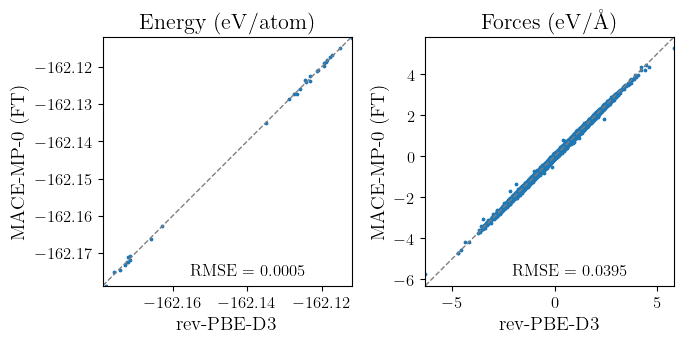

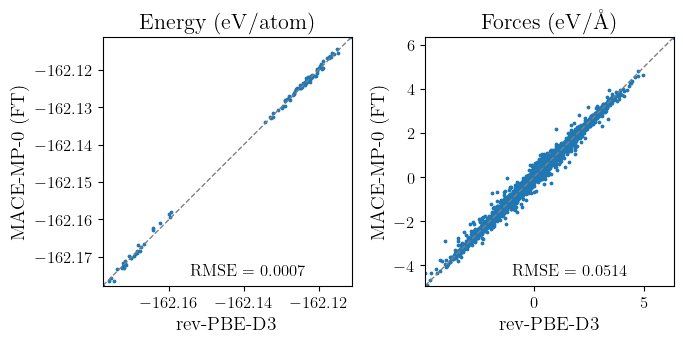

In [140]:
train_data_scratch_30 = read("/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/results/evaluation_data_scratch/scratch_rev_PBE_D3_30_eval_train.xyz", ':')
#test_data = train_data[:3]+read("/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/tests/revPBE_D3/FT_rev_PBE_D3_eval_test.xyz", ':') #append the E0s for computing atomization energy errors

test_data_scratch_30 = read("/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/results/evaluation_data_scratch/scratch_rev_PBE_D3_30_eval_test.xyz", ':')

plot_RMSEs(train_data_scratch_30, labs=['rev-PBE-D3', 'MACE-MP-0 (FT)'], theory="rPBED3")
plot_RMSEs(test_data_scratch_30, labs=['rev-PBE-D3', 'MACE-MP-0 (FT)'], theory="rPBED3")

In [142]:
RMSE_energies_small

[0.0025559432319118684,
 0.0019323988160673676,
 0.0019088609938614522,
 0.0018536908451823597,
 0.0020071718900295937]

In [143]:
RMSE_energies_scratch

[0.00288199049604275,
 0.0006696689073324127,
 0.00033805219570861444,
 0.00022704972988220535]

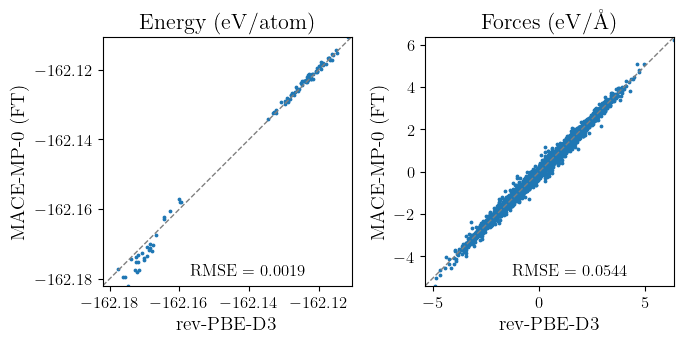

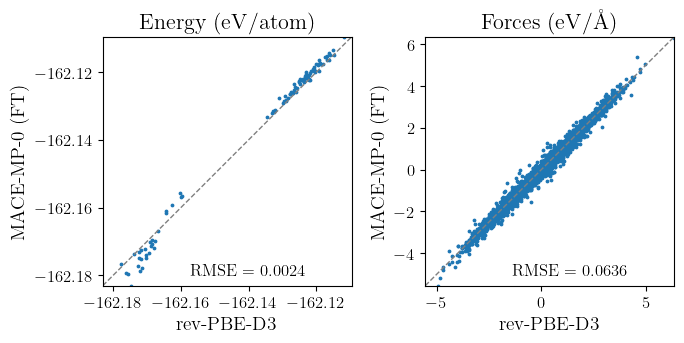

In [172]:
test_data_FT_50 = read("evaluation_data_medium/FT_rev_PBE_D3_50_eval_test_medium.xyz", ':')
test_data_FT_swa_50 = read("evaluation_data_medium/FT_swa_rev_PBE_D3_50_eval_test.xyz", ':')

plot_RMSEs(test_data_FT_50, labs=['rev-PBE-D3', 'MACE-MP-0 (FT)'], theory="rPBED3")
plot_RMSEs(test_data_FT_swa_50, labs=['rev-PBE-D3', 'MACE-MP-0 (FT)'], theory="rPBED3")

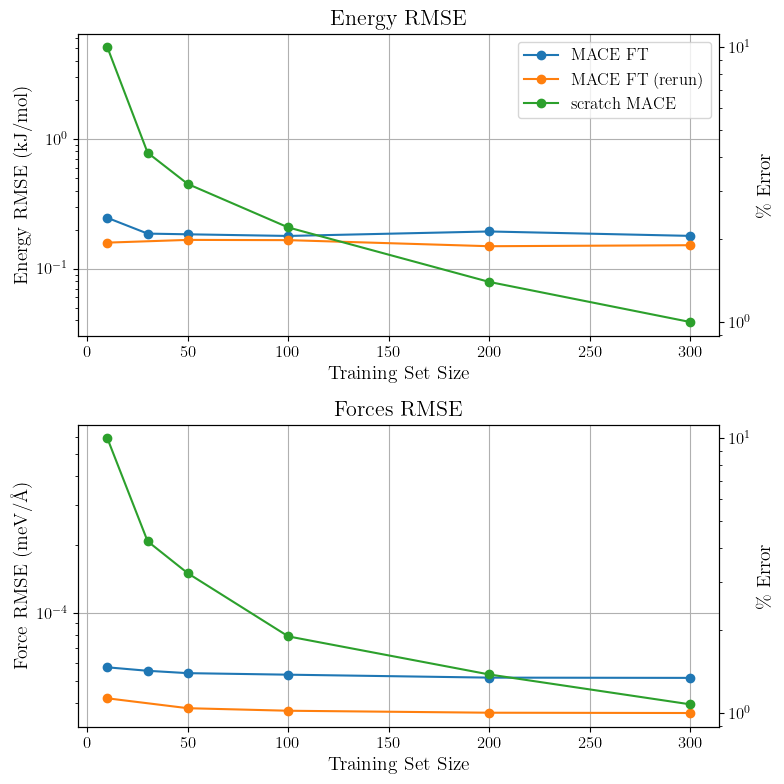

In [188]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 1, figsize=(8, 8))  # 2 rows, 1 column

# Compute relative RMSE (assuming these values exist)
relative_RMSE_energies = np.array(RMSE_energies_small) / np.std(RMSE_energies_small) * 100  # Percentage relative to std
relative_RMSE_forces = np.array(RMSE_forces_small) / np.std(RMSE_forces_small) * 100  # Percentage relative to std

# Plot Energy RMSE (Primary y-axis)
ax1 = axes[0]
ax1.plot(training_set_sizes_small, np.array(RMSE_energies_small) * 1.6e-19 * 6.02e23 / 1000, marker="o", label="MACE FT")
ax1.plot(training_set_sizes_medium_rerun, np.array(RMSE_energies_medium_rerun) * 1.6e-19 * 6.02e23 / 1000, marker="o", label="MACE FT (rerun)")
#ax1.plot(training_set_sizes_medium, np.array(RMSE_energies_medium) * 1.6e-19 * 6.02e23 / 1000, marker="o", label="medium MACE (fine-tuned)")
#ax1.plot(training_set_sizes_medium_pt1000, np.array(RMSE_energies_medium_pt1000) * 1.6e-19 * 6.02e23 / 1000, marker="o", label="MACE (fine-tuned) pt1000")
ax1.plot(training_set_sizes_scratch_20epoch, np.array(RMSE_energies_scratch_20epoch) * 1.6e-19 * 6.02e23 / 1000, marker="o", label="scratch MACE")
ax1.set_ylabel("Energy RMSE (kJ/mol)")
ax1.set_xlabel("Training Set Size")
ax1.set_title("Energy RMSE")
ax1.set_yscale("log")
ax1.grid(True)
ax1.legend(loc="upper right")

# Add second y-axis for relative RMSE
ax1b = ax1.twinx()
ax1b.set_ylabel(r"$\%$ Error")
ax1b.set_yscale("log") 

# Plot Forces RMSE (Primary y-axis)
ax2 = axes[1]
ax2.plot(training_set_sizes_small, np.array(RMSE_forces_small) / 1000, marker="o")
ax2.plot(training_set_sizes_medium_rerun, np.array(RMSE_forces_medium_rerun) / 1000, marker="o")
#ax2.plot(training_set_sizes_medium, np.array(RMSE_forces_medium) / 1000, marker="o")
#ax2.plot(training_set_sizes_medium_pt1000, np.array(RMSE_forces_medium_pt1000) / 1000, marker="o")
ax2.plot(training_set_sizes_scratch_20epoch, np.array(RMSE_forces_scratch_20epoch) / 1000, marker="o")
ax2.set_ylabel(r"Force RMSE $\rm (meV/\AA)$")
ax2.set_xlabel("Training Set Size")
ax2.set_yscale("log")
ax2.set_title("Forces RMSE")
ax2.grid(True)


# Add second y-axis for relative RMSE
ax2b = ax2.twinx()
ax2b.set_ylabel(r"$\%$ Error")
ax2b.set_yscale("log")

plt.tight_layout()
plt.show()


In [253]:
training_set_sizes_medium_revPBE0 = [10, 30, 50, 100, 200, 300]
RMSE_energies_medium_revPBE0 = []
RMSE_forces_medium_revPBE0 = []

for size in training_set_sizes_medium_revPBE0:
    test_data = read(f"evaluation_FT_revPBE0/FT_medium_rev_PBE0_D3_{size}_eval_test.xyz", ':')
    calc = calc_RMSE(test_data, theory="rPBE0D3")
    RMSE_energies_medium_revPBE0.append(calc[0])
    RMSE_forces_medium_revPBE0.append(calc[1])
    
    
training_set_sizes_medium_MP2 = [10, 30, 50, 100, 200, 300]
RMSE_energies_medium_MP2 = []
RMSE_forces_medium_MP2 = []

for size in training_set_sizes_medium_MP2:
    test_data = read(f"evaluation_FT_MP2/FT_medium_MP2_{size}_eval_test.xyz", ':')
    calc = calc_RMSE(test_data, theory="MP2")
    RMSE_energies_medium_MP2.append(calc[0])
    RMSE_forces_medium_MP2.append(calc[1])
    

training_set_sizes_scratch_20epoch_revPBE0 = [10, 30, 50, 100, 200, 300]
RMSE_energies_scratch_20epoch_revPBE0 = []
RMSE_forces_scratch_20epoch_revPBE0 = []

for size in training_set_sizes_scratch_20epoch_revPBE0: 
    test_data = read(f"evaluation_scratch_revPBE0/scratch_20epoch_revPBE0_D3_{size}_eval_test.xyz", ':')
    calc = calc_RMSE(test_data, theory="rPBE0D3")
    RMSE_energies_scratch_20epoch_revPBE0.append(calc[0])
    RMSE_forces_scratch_20epoch_revPBE0.append(calc[1])
    

training_set_sizes_scratch_20epoch_MP2 = [10, 30, 50, 100, 200, 300]
RMSE_energies_scratch_20epoch_MP2 = []
RMSE_forces_scratch_20epoch_MP2 = []

for size in training_set_sizes_scratch_20epoch_revPBE0: 
    test_data = read(f"evaluation_scratch_MP2/scratch_20epoch_MP2_{size}_eval_test.xyz", ':')
    calc = calc_RMSE(test_data, theory="MP2")
    RMSE_energies_scratch_20epoch_MP2.append(calc[0])
    RMSE_forces_scratch_20epoch_MP2.append(calc[1])

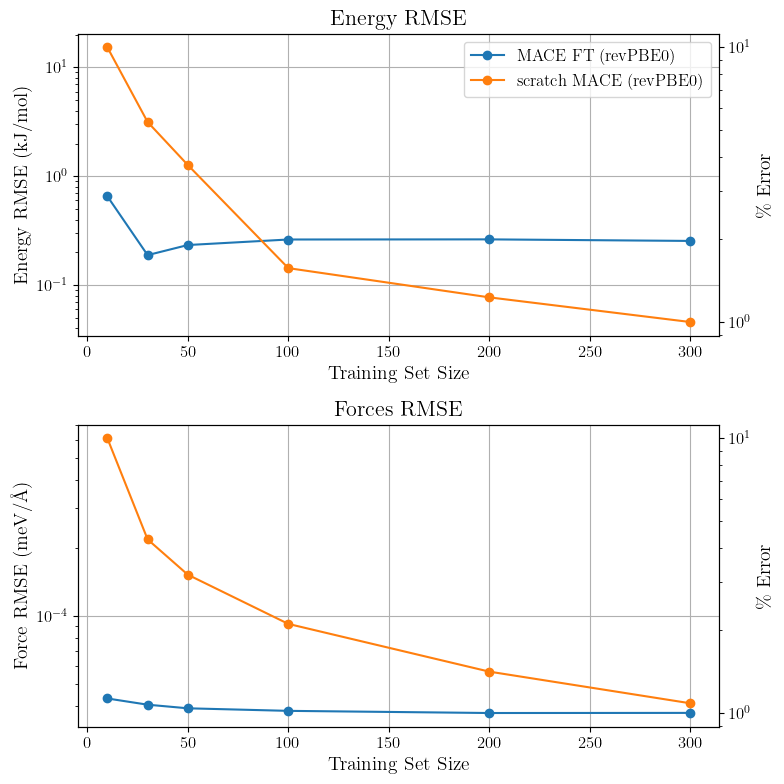

In [254]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))  # 2 rows, 1 column

# Compute relative RMSE (assuming these values exist)
relative_RMSE_energies = np.array(RMSE_energies_small) / np.std(RMSE_energies_small) * 100  # Percentage relative to std
relative_RMSE_forces = np.array(RMSE_forces_small) / np.std(RMSE_forces_small) * 100  # Percentage relative to std

# Plot Energy RMSE (Primary y-axis)
ax1 = axes[0]
ax1.plot(training_set_sizes_medium_revPBE0, np.array(RMSE_energies_medium_revPBE0) * 1.6e-19 * 6.02e23 / 1000, marker="o", label="MACE FT (revPBE0)")
ax1.plot(training_set_sizes_scratch_20epoch_revPBE0, np.array(RMSE_energies_scratch_20epoch_revPBE0) * 1.6e-19 * 6.02e23 / 1000, marker="o", label="scratch MACE (revPBE0)")
ax1.set_ylabel("Energy RMSE (kJ/mol)")
ax1.set_xlabel("Training Set Size")
ax1.set_title("Energy RMSE")
ax1.set_yscale("log")
ax1.grid(True)
ax1.legend(loc="upper right")

# Add second y-axis for relative RMSE
ax1b = ax1.twinx()
ax1b.set_ylabel(r"$\%$ Error")
ax1b.set_yscale("log") 

# Plot Forces RMSE (Primary y-axis)
ax2 = axes[1]
ax2.plot(training_set_sizes_medium_revPBE0, np.array(RMSE_forces_medium_revPBE0) / 1000, marker="o")
ax2.plot(training_set_sizes_scratch_20epoch_revPBE0, np.array(RMSE_forces_scratch_20epoch_revPBE0) / 1000, marker="o")
ax2.set_ylabel(r"Force RMSE $\rm (meV/\AA)$")
ax2.set_xlabel("Training Set Size")
ax2.set_yscale("log")
ax2.set_title("Forces RMSE")
ax2.grid(True)


# Add second y-axis for relative RMSE
ax2b = ax2.twinx()
ax2b.set_ylabel(r"$\%$ Error")
ax2b.set_yscale("log")

plt.tight_layout()
plt.show()


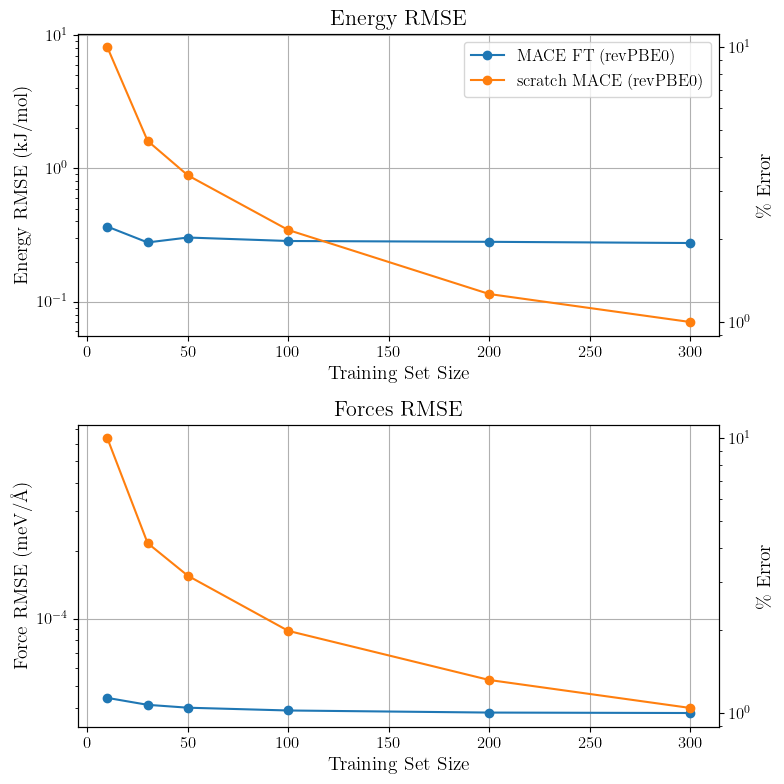

In [255]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))  # 2 rows, 1 column

# Compute relative RMSE (assuming these values exist)
relative_RMSE_energies = np.array(RMSE_energies_small) / np.std(RMSE_energies_small) * 100  # Percentage relative to std
relative_RMSE_forces = np.array(RMSE_forces_small) / np.std(RMSE_forces_small) * 100  # Percentage relative to std

# Plot Energy RMSE (Primary y-axis)
ax1 = axes[0]
ax1.plot(training_set_sizes_medium_MP2, np.array(RMSE_energies_medium_MP2) * 1.6e-19 * 6.02e23 / 1000, marker="o", label="MACE FT (revPBE0)")
ax1.plot(training_set_sizes_scratch_20epoch_MP2, np.array(RMSE_energies_scratch_20epoch_MP2) * 1.6e-19 * 6.02e23 / 1000, marker="o", label="scratch MACE (revPBE0)")
ax1.set_ylabel("Energy RMSE (kJ/mol)")
ax1.set_xlabel("Training Set Size")
ax1.set_title("Energy RMSE")
ax1.set_yscale("log")
ax1.grid(True)
ax1.legend(loc="upper right")

# Add second y-axis for relative RMSE
ax1b = ax1.twinx()
ax1b.set_ylabel(r"$\%$ Error")
ax1b.set_yscale("log") 

# Plot Forces RMSE (Primary y-axis)
ax2 = axes[1]
ax2.plot(training_set_sizes_medium_MP2, np.array(RMSE_forces_medium_MP2) / 1000, marker="o")
ax2.plot(training_set_sizes_scratch_20epoch_MP2, np.array(RMSE_forces_scratch_20epoch_MP2) / 1000, marker="o")
ax2.set_ylabel(r"Force RMSE $\rm (meV/\AA)$")
ax2.set_xlabel("Training Set Size")
ax2.set_yscale("log")
ax2.set_title("Forces RMSE")
ax2.grid(True)


# Add second y-axis for relative RMSE
ax2b = ax2.twinx()
ax2b.set_ylabel(r"$\%$ Error")
ax2b.set_yscale("log")

plt.tight_layout()
plt.show()

### New E0s

In [12]:
training_set_sizes_medium_revPBE_newE0 = [10, 30, 50, 100, 200, 300]
RMSE_energies_medium_revPBE_newE0 = []
RMSE_forces_medium_revPBE_newE0 = []

for size in training_set_sizes_medium_revPBE_newE0:
    test_data = read(f"evaluation_data_medium/FT_newE0s_medium_rev_PBE_D3_{size}_eval_test.xyz", ':')
    calc = calc_RMSE(test_data, theory="rPBED3")
    RMSE_energies_medium_revPBE_newE0.append(calc[0])
    RMSE_forces_medium_revPBE_newE0.append(calc[1])
    


training_set_sizes_scratch_revPBE_newE0 = [10, 30, 50, 100, 200, 300]
RMSE_energies_scratch_revPBE_newE0 = []
RMSE_forces_scratch_revPBE_newE0 = []

for size in training_set_sizes_scratch_revPBE_newE0:
    test_data = read(f"evaluation_data_scratch/scratch_newE0s_revPBE_D3_{size}_eval_test.xyz", ':')
    calc = calc_RMSE(test_data, theory="rPBED3")
    RMSE_energies_scratch_revPBE_newE0.append(calc[0])
    RMSE_forces_scratch_revPBE_newE0.append(calc[1])

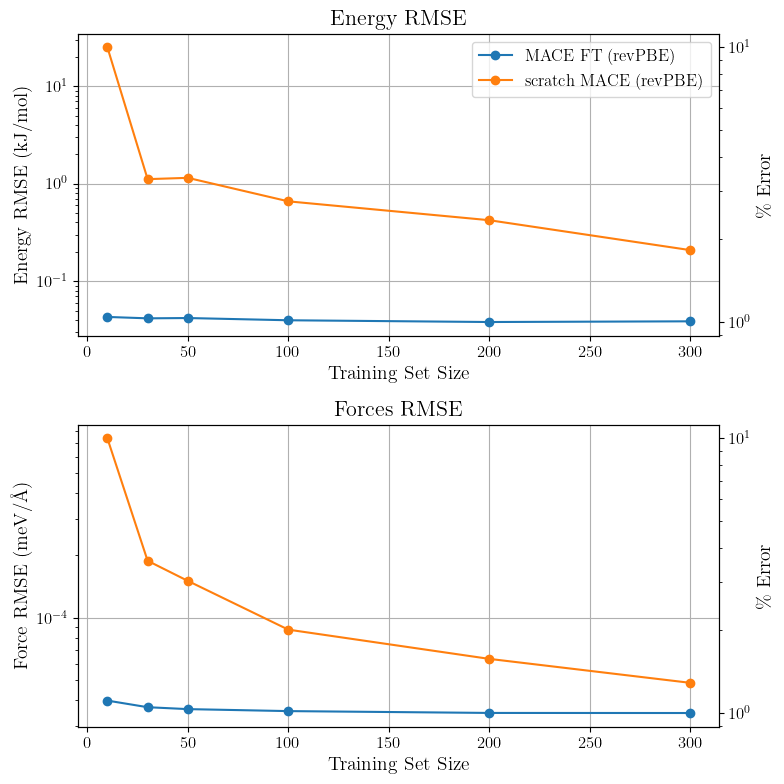

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))  # 2 rows, 1 column

# # Compute relative RMSE (assuming these values exist)
# relative_RMSE_energies = np.array(RMSE_energies_small) / np.std(RMSE_energies_small) * 100  # Percentage relative to std
# relative_RMSE_forces = np.array(RMSE_forces_small) / np.std(RMSE_forces_small) * 100  # Percentage relative to std

# Plot Energy RMSE (Primary y-axis)
ax1 = axes[0]
ax1.plot(training_set_sizes_medium_revPBE_newE0, np.array(RMSE_energies_medium_revPBE_newE0) * 1.6e-19 * 6.02e23 / 1000, marker="o", label="MACE FT (revPBE)")
ax1.plot(training_set_sizes_scratch_revPBE_newE0, np.array(RMSE_energies_scratch_revPBE_newE0) * 1.6e-19 * 6.02e23 / 1000, marker="o", label="scratch MACE (revPBE)")

ax1.set_ylabel("Energy RMSE (kJ/mol)")
ax1.set_xlabel("Training Set Size")
ax1.set_title("Energy RMSE")
ax1.set_yscale("log")
ax1.grid(True)
ax1.legend(loc="upper right")

# Add second y-axis for relative RMSE
ax1b = ax1.twinx()
ax1b.set_ylabel(r"$\%$ Error")
ax1b.set_yscale("log") 

# Plot Forces RMSE (Primary y-axis)
ax2 = axes[1]
ax2.plot(training_set_sizes_medium_revPBE_newE0, np.array(RMSE_forces_medium_revPBE_newE0) / 1000, marker="o")
ax2.plot(training_set_sizes_scratch_revPBE_newE0, np.array(RMSE_forces_scratch_revPBE_newE0) / 1000, marker="o")

ax2.set_ylabel(r"Force RMSE $\rm (meV/\AA)$")
ax2.set_xlabel("Training Set Size")
ax2.set_yscale("log")
ax2.set_title("Forces RMSE")
ax2.grid(True)


# Add second y-axis for relative RMSE
ax2b = ax2.twinx()
ax2b.set_ylabel(r"$\%$ Error")
ax2b.set_yscale("log")

plt.tight_layout()
plt.show()

### E0 error

In [248]:
from mace.calculators import mace_mp

macemp = mace_mp(model="/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/FT_models/MACE_revPBE_D3_20.model")

Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/Users/joehart/Desktop/0_Cambridge/0_MPhil_Scientific_Computing/Written_assignments/Fine-Tuning-MACE/notebooks_FT/venv_mace/lib/python3.12/site-packages/mace/calculators/mace.py:139: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)
